In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv( 'StudentsPerformance.csv' )

In [27]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [28]:
df['lunch'].replace(['standard', 'free/reduced'], [0, 1], inplace=True)
df['test preparation course'].replace(['none', 'completed'], [0, 1], inplace=True)

df['Total score'] = df['math score'] + df['writing score'] + df['reading score']
df

<ipython-input-28-b66401b683ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lunch'].replace(['standard', 'free/reduced'], [0, 1], inplace=True)
<ipython-input-28-b66401b683ed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['lunch'].replace(['standard', 'free/reduced'], [0, 1], inplace=

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,0,0,72,72,74,218
1,female,group C,some college,0,1,69,90,88,247
2,female,group B,master's degree,0,0,90,95,93,278
3,male,group A,associate's degree,1,0,47,57,44,148
4,male,group C,some college,0,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,0,1,88,99,95,282
996,male,group C,high school,1,0,62,55,55,172
997,female,group C,high school,1,1,59,71,65,195
998,female,group D,some college,0,1,68,78,77,223


In [29]:
df.to_csv('Clean_StudentPerformnce.csv')

# Pie Chart of Parental level of Education Types

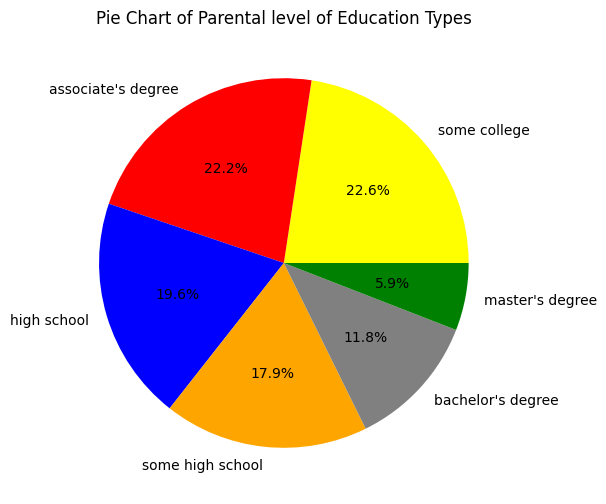

In [30]:
a = df['parental level of education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=['yellow', 'red', 'blue', 'orange', 'grey', 'green'])
plt.title('Pie Chart of Parental level of Education Types')
plt.show()

# Scatter Plot of reading score vs. Math Scores

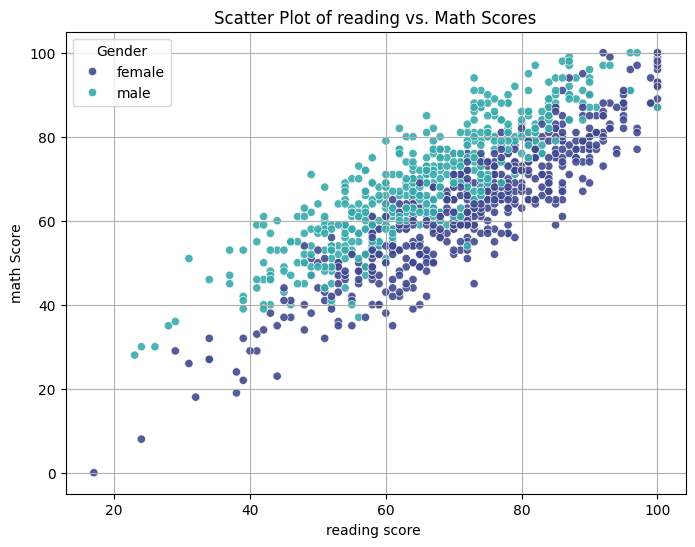

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reading score', y='math score', data=df, hue='gender', palette='mako', alpha=0.9)
plt.xlabel('reading score ')
plt.ylabel('math Score')
plt.title('Scatter Plot of reading vs. Math Scores')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

# Histogram of writing Scores

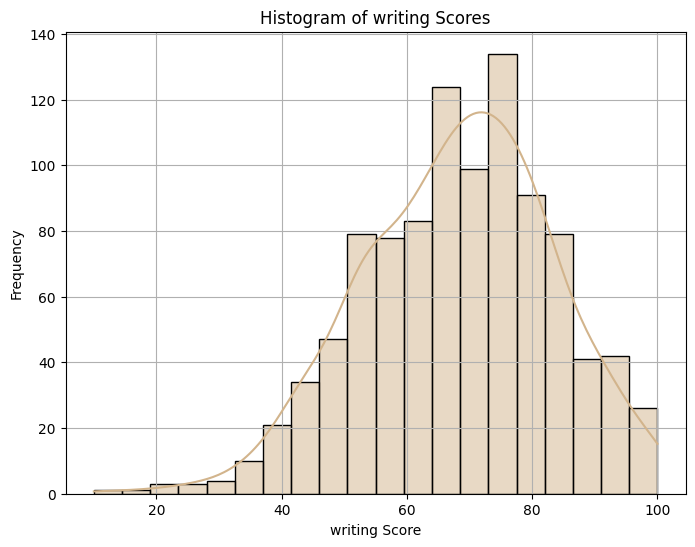

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df['writing score'], bins=20, kde=True, color='tan')
plt.xlabel('writing Score')
plt.ylabel('Frequency')
plt.title('Histogram of writing Scores')
plt.grid(True)
plt.show()

# Box Plot of Total Scores by race/ethnicity

<ipython-input-33-94c7b7888dcb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race/ethnicity', y='Total score', data=df, palette='viridis')


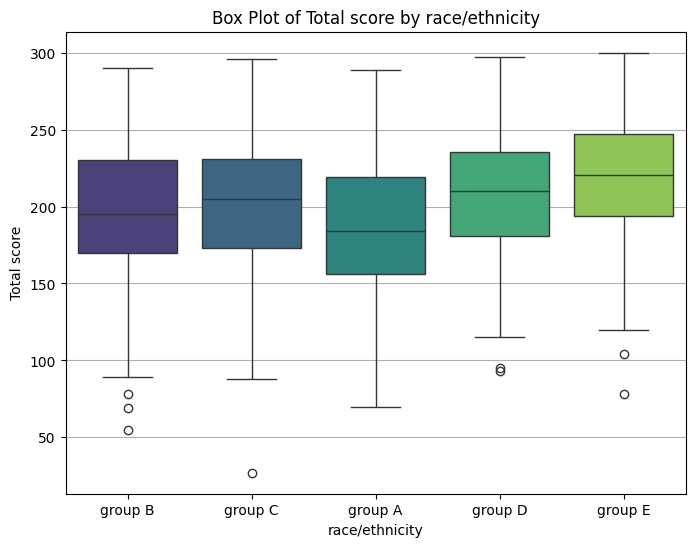

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='race/ethnicity', y='Total score', data=df, palette='viridis')
plt.xlabel('race/ethnicity')
plt.ylabel('Total score')
plt.title('Box Plot of Total score by race/ethnicity')
plt.grid(axis='y')
plt.show()

# Bar Chart of test preparation course Types

<ipython-input-34-eb93371baae4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='test preparation course', data=df, palette='rocket', order=df['test preparation course'].value_counts().index)


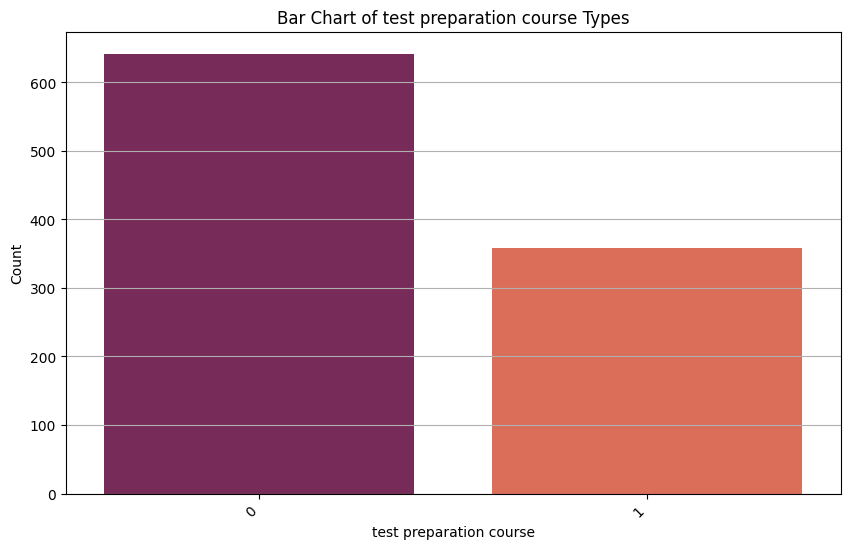

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='test preparation course', data=df, palette='rocket', order=df['test preparation course'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('test preparation course')
plt.ylabel('Count')
plt.title('Bar Chart of test preparation course Types')
plt.grid(axis='y')
plt.show()